In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("final_data.csv")

df = df.iloc[:,1:]
df

,gu,dong,code,income_level,pop_density,company
0,종로구,청운효자동,1111051500,8.0,5051,1028.0
1,종로구,사직동,1111053000,9.0,7980,3574.0
2,종로구,삼청동,1111054000,7.0,2011,732.0
3,종로구,부암동,1111055000,7.0,4648,599.0
4,종로구,평창동,1111056000,8.0,2121,761.0
...,...,...,...,...,...,...
419,강동구,성내2동,1174065000,6.0,37591,1836.0
420,강동구,성내3동,1174066000,7.0,33692,2439.0
421,강동구,길동,1174068500,7.0,21367,5037.0
422,강동구,둔촌1동,1174069000,7.0,308,17.0


In [3]:
# 결측치 없는거 확인함.

df.isnull().sum()

gu              0
dong            0
code            0
income_level    0
pop_density     0
company         7
dtype: int64

In [4]:
# 결측치가 있는 행을 보여줌
missing_rows = df[df['company'].isnull()]

# 결과 출력
missing_rows

# 15472, 7238, 1013, 2123, 1382, 1196, 1921

,gu,dong,code,income_level,pop_density,company
8,종로구,종로1·2·3·4가동,1111061500,7.0,3594,NaN
9,종로구,종로5·6가동,1111063000,6.0,9732,NaN
56,성동구,금호2·3가동,1120061500,8.0,37767,NaN
99,중랑구,면목3·8동,1126057500,5.0,15922,NaN
167,노원구,중계2·3동,1135062500,7.0,40848,NaN
170,노원구,상계3·4동,1135066500,6.0,4594,NaN
172,노원구,상계6·7동,1135069500,7.0,31214,NaN


In [5]:
# 대체할 값들
replacement_values = {8: 15472, 9: 7238, 56: 1013, 99: 2123, 167: 1382, 170: 1196, 172: 1921}

# 주어진 행에 대해 NaN 값을 대체
for index, value in replacement_values.items():
    df.loc[index, 'company'] = value

In [6]:
data_copy = df.iloc[:, 3:].astype("float64")
data_c = data_copy.values

In [7]:
data_c

array([[8.0000e+00, 5.0510e+03, 1.0280e+03],
       [9.0000e+00, 7.9800e+03, 3.5740e+03],
       [7.0000e+00, 2.0110e+03, 7.3200e+02],
       ...,
       [7.0000e+00, 2.1367e+04, 5.0370e+03],
       [7.0000e+00, 3.0800e+02, 1.7000e+01],
       [7.0000e+00, 2.8318e+04, 1.5530e+03]])

## scaler

In [8]:
scaler = StandardScaler()
data_c = scaler.fit_transform(data_c)

data_c

array([[ 0.95112016, -1.58259674, -0.47465558],
       [ 1.88247108, -1.33797444,  0.84678854],
       [ 0.01976924, -1.83648947, -0.62828774],
       ...,
       [ 0.01976924, -0.21992776,  1.60612584],
       [ 0.01976924, -1.9787195 , -0.99939243],
       [ 0.01976924,  0.3606013 , -0.20216612]])

In [9]:
np.isnan(data_c).any()  # Check for NaN values
np.isinf(data_c).any()  # Check for infinite values

False

## Elbow Method to find K for KMeans Clustering

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


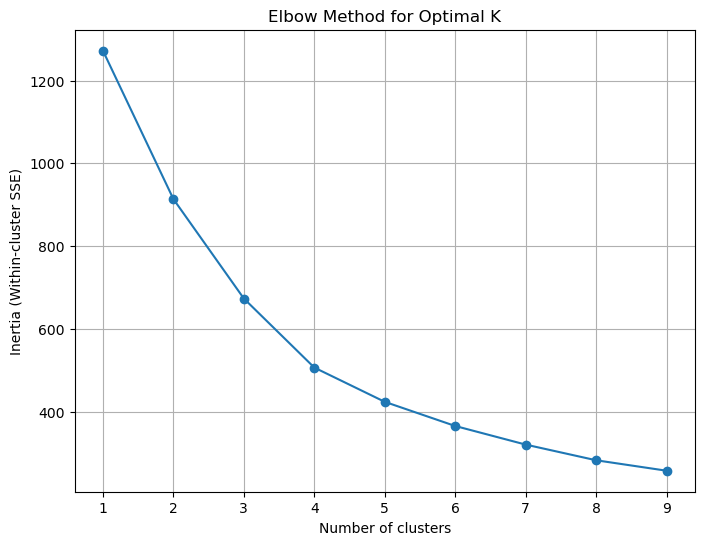

<Figure size 640x480 with 0 Axes>

In [10]:
cluster_range = range(1, 10)
inertia = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_c)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()
plt.savefig('elbow_method_result_3var.png')

## Silhouette Analysis for find optimal K

- 각 데이터 포인트가 속한 클러스터의 일관성을 측정하여 최적의 K값을 찾는 방법
- 각 데이터 포인트의 실루엣 계수를 계산하여, 전체 데이터 포인트의 평균 실루엣 계 구하기
- 실루엣 계수는 클러스터의 일관성을 나타내며, 값이 높을수록 클러스터링 결과가 좋다는 것을 의미

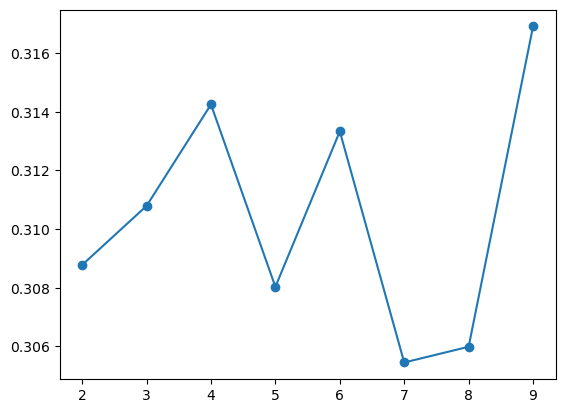

In [11]:
# 실루엣 분석을 사용하여 최적의 K값 탐색
cluster_range = range(2, 10)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_c)
    score = silhouette_score(data_c, kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 분석 그래프 그리기
plt.plot(range(2, 10), silhouette_scores, marker='o')

## As a result of Elbow-method & Silhouette Analysis, We can decide K as 4

In [12]:
kmeans = KMeans(n_clusters=4, max_iter=100, verbose=1)
clusters = kmeans.fit_predict(data_c)

Initialization complete
Iteration 0, inertia 667.5048758689959
Iteration 1, inertia 558.5162842423379
Iteration 2, inertia 537.5034204149391
Iteration 3, inertia 530.8442364045158
Iteration 4, inertia 524.4949544527534
Iteration 5, inertia 524.4601806839306
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 876.3031602373464
Iteration 1, inertia 544.1381356147045
Iteration 2, inertia 524.080569725788
Iteration 3, inertia 521.6896725199878
Iteration 4, inertia 521.0498305208864
Iteration 5, inertia 520.2682284348391
Iteration 6, inertia 520.0420245869004
Iteration 7, inertia 520.0236340501766
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 751.7107262444738
Iteration 1, inertia 542.2614159943012
Iteration 2, inertia 528.8823345807548
Iteration 3, inertia 526.4067469179246
Iteration 4, inertia 525.9360611867426
Iteration 5, inertia 525.7361277671021
Iteration 6, inertia 525.6121478370243
Iteration 7, inert

### The result of Data that included in cluster

In [13]:
cluster_nums = []
for doc_num, cluster_num in enumerate(clusters): 
    cluster_nums.append(cluster_num)
    print(doc_num, cluster_num)

0 0
1 0
2 2
3 2
4 0
5 0
6 0
7 2
8 1
9 1
10 2
11 2
12 2
13 3
14 3
15 3
16 3
17 0
18 1
19 1
20 2
21 2
22 1
23 1
24 1
25 3
26 3
27 3
28 3
29 3
30 3
31 0
32 2
33 2
34 2
35 2
36 0
37 0
38 2
39 3
40 0
41 0
42 2
43 2
44 2
45 0
46 0
47 2
48 3
49 3
50 2
51 2
52 0
53 3
54 0
55 3
56 3
57 0
58 0
59 0
60 2
61 2
62 1
63 2
64 2
65 2
66 3
67 2
68 3
69 3
70 2
71 2
72 0
73 3
74 2
75 0
76 2
77 3
78 2
79 0
80 1
81 2
82 3
83 2
84 3
85 3
86 3
87 3
88 2
89 2
90 2
91 2
92 2
93 3
94 3
95 2
96 2
97 3
98 2
99 2
100 3
101 3
102 3
103 2
104 3
105 3
106 2
107 2
108 2
109 2
110 2
111 3
112 2
113 3
114 3
115 2
116 3
117 3
118 2
119 2
120 2
121 3
122 3
123 3
124 3
125 2
126 3
127 2
128 3
129 2
130 3
131 2
132 3
133 3
134 3
135 3
136 2
137 2
138 2
139 3
140 3
141 2
142 2
143 3
144 3
145 2
146 0
147 3
148 2
149 3
150 2
151 3
152 3
153 3
154 3
155 3
156 2
157 2
158 2
159 3
160 3
161 2
162 0
163 3
164 0
165 3
166 2
167 3
168 2
169 3
170 2
171 3
172 3
173 3
174 3
175 2
176 2
177 2
178 2
179 2
180 3
181 2
182 3
183 2
184 3


In [14]:
kmeans.labels_

array([0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 3, 3, 3, 3, 0, 1, 1, 2, 2,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 2, 2,
       2, 0, 0, 2, 3, 3, 2, 2, 0, 3, 0, 3, 3, 0, 0, 0, 2, 2, 1, 2, 2, 2,
       3, 2, 3, 3, 2, 2, 0, 3, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 0, 3, 2, 3, 2, 3, 3, 3,
       3, 3, 2, 2, 2, 3, 3, 2, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 0, 0, 3, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 3, 0, 0, 1, 2, 2, 3, 3, 2,
       2, 0, 0, 3, 3, 3, 0, 3, 3, 2, 3, 2, 2, 2, 0, 3, 2, 3, 0, 0, 0, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2, 2, 2, 0, 2, 3, 2, 2, 0, 2, 1, 1,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       1, 1, 3, 0, 2, 1, 2, 0, 3, 3, 3, 2, 3, 0, 3,

In [15]:
len(kmeans.labels_)

424

In [16]:
df['label'] = cluster_nums
df

,gu,dong,code,income_level,pop_density,company,label
0,종로구,청운효자동,1111051500,8.0,5051,1028.0,0
1,종로구,사직동,1111053000,9.0,7980,3574.0,0
2,종로구,삼청동,1111054000,7.0,2011,732.0,2
3,종로구,부암동,1111055000,7.0,4648,599.0,2
4,종로구,평창동,1111056000,8.0,2121,761.0,0
...,...,...,...,...,...,...,...
419,강동구,성내2동,1174065000,6.0,37591,1836.0,3
420,강동구,성내3동,1174066000,7.0,33692,2439.0,3
421,강동구,길동,1174068500,7.0,21367,5037.0,1
422,강동구,둔촌1동,1174069000,7.0,308,17.0,2


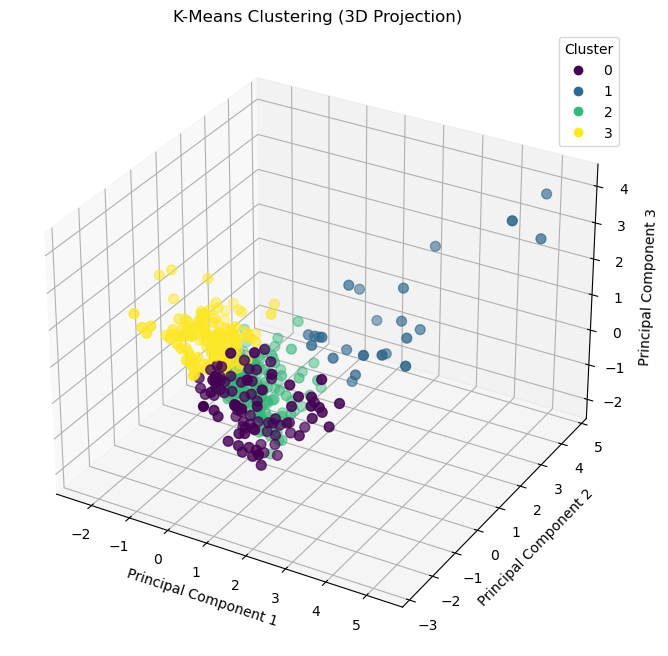

<Figure size 640x480 with 0 Axes>

In [17]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)
data_3d = pca.fit_transform(data_c)

# K-Means 클러스터링 결과
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=clusters, cmap='viridis', s=50)
ax.set_title('K-Means Clustering (3D Projection)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()


plt.savefig('clustering_3D.png',dpi = 300)

## Extract the result

In [25]:
df.to_csv('cluster_labeling_var3.csv', encoding = 'utf-8-sig')